In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years = range(2002,2018)
current_year_columns = ['FantasyPointsPerGame','PassingYards', 'PassingTouchdowns', 'PassingInterceptions', 'Played', 'RushingYards','RushingTouchdowns','Receptions','ReceivingYards','ReceivingTouchdowns','FumblesLost']
prev_year_columns = ['PrevPPG', 'PrevPassingYards','PrevPassingTouchdowns','PrevPassingInterceptions','PrevPlayed', 'PrevRushingYards','PrevRushingTouchdowns','PrevReceptions','PrevReceivingYards','PrevReceivingTouchdowns','PrevFumblesLost']
rolling_columns = ['RollingPPG', 'RollingPassingYards','RollingPassingTouchdowns','RollingPassingInterceptions','RollingPlayed', 'RollingRushingYards','RollingRushingTouchdowns','RollingReceptions','RollingReceivingYards','RollingReceivingTouchdowns','RollingFumblesLost']
feature_columns = rolling_columns + ['YearsInLeague']
target_column = 'FantasyPointsPerGame'



year_dfs = []
for year in years:
    year_df = pd.read_csv('./datasets/fantasy-football-leaders-{}.csv'.format(year))
    year_df['Year'] = year
    year_dfs.append(year_df)

all_players = pd.concat(year_dfs)
all_players = all_players.sort_values(['Name', 'Year'])
same_player_boolean_mask = all_players['Name'].shift() == all_players['Name']
all_players[prev_year_columns] = all_players[current_year_columns].shift()
all_players = all_players[same_player_boolean_mask]

all_players = all_players.set_index('Name')
all_players['RookieYear'] = all_players.groupby('Name')['Year'].min() - 1
all_players.reset_index(inplace=True)
all_players['YearsInLeague'] = all_players['Year'] - all_players['RookieYear']
all_players.head(15)

,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,...,PrevPassingInterceptions,PrevPlayed,PrevRushingYards,PrevRushingTouchdowns,PrevReceptions,PrevReceivingYards,PrevReceivingTouchdowns,PrevFumblesLost,RookieYear,YearsInLeague
0,A Becht,NYJ,WR,16,0,0,0,0,0,40,...,0.0,16.0,0.0,0.0,28.0,243.0,5.0,0.0,2002,1
1,A Bryant,DAL,WR,16,0,0,0,0,0,39,...,0.0,16.0,40.0,0.0,44.0,733.0,6.0,2.0,2002,1
2,A Bryant,CLE,WR,10,0,0,0,0,0,42,...,0.0,16.0,0.0,0.0,39.0,550.0,2.0,0.0,2002,2
3,A Bryant,DAL,WR,5,0,0,0,0,0,16,...,0.0,10.0,0.0,0.0,42.0,546.0,4.0,0.0,2002,2
4,A Bryant,CLE,WR,16,0,0,0,3,0,69,...,0.0,5.0,0.0,0.0,16.0,266.0,0.0,1.0,2002,3
5,A Bryant,SF,WR,14,0,0,0,0,0,40,...,0.0,16.0,3.0,0.0,69.0,1009.0,4.0,1.0,2002,4
6,A Cason,DAL,RB,10,37,0,0,220,2,17,...,0.0,10.0,107.0,0.0,19.0,288.0,2.0,0.0,2002,1
7,A Davis,CLE,WR,16,0,0,0,17,0,31,...,0.0,16.0,7.0,0.0,18.0,232.0,3.0,0.0,2002,1
8,A Davis,CLE,WR,7,0,0,0,-3,0,16,...,0.0,16.0,17.0,0.0,31.0,479.0,4.0,1.0,2002,2
9,A Davis,NE,WR,9,0,0,0,0,0,9,...,0.0,7.0,-3.0,0.0,16.0,416.0,2.0,0.0,2002,3


In [91]:
all_players = all_players.set_index('Name')
all_players[rolling_columns] = all_players.groupby('Name')[prev_year_columns].rolling(2).mean().reset_index(0, drop=True)
all_players.reset_index(inplace=True)
all_players[feature_columns + ['Name']]



,RollingPPG,RollingPassingYards,RollingPassingTouchdowns,RollingPassingInterceptions,RollingPlayed,RollingRushingYards,RollingRushingTouchdowns,RollingReceptions,RollingReceivingYards,RollingReceivingTouchdowns,RollingFumblesLost,YearsInLeague,Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A Becht
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A Bryant
2,5.50,0.0,0.0,0.0,16.0,20.0,0.0,41.5,641.5,4.0,1.0,2,A Bryant
3,6.05,0.0,0.0,0.0,13.0,0.0,0.0,40.5,548.0,3.0,0.0,2,A Bryant
4,6.40,0.0,0.0,0.0,7.5,0.0,0.0,29.0,406.0,2.0,0.5,3,A Bryant
5,6.30,0.0,0.0,0.0,10.5,1.5,0.0,42.5,637.5,2.0,1.0,4,A Bryant
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A Cason
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A Davis
8,3.55,0.0,0.0,0.0,16.0,12.0,0.0,24.5,355.5,3.5,0.5,2,A Davis
9,6.05,0.0,0.0,0.0,11.5,7.0,0.0,23.5,447.5,3.0,0.5,3,A Davis


In [15]:
## KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = non_rookies['PrevPPG'].values.reshape(-1,1)
y = non_rookies['FantasyPointsPerGame'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 6).fit(X_train, y_train)
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


NameError: name 'non_rookies' is not defined

In [147]:
## Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[0.75009891]]
linear model intercept (b): [1.72430836]
R-squared score (training): 0.582
R-squared score (test): 0.561


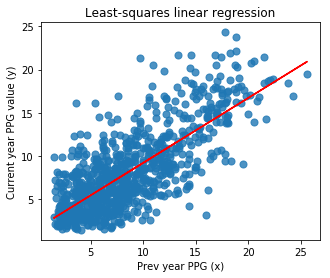

In [148]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Prev year PPG (x)')
plt.ylabel('Current year PPG value (y)')
plt.show()

In [149]:
## Ridge regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Ridge

X = all_players[feature_columns].values
y = all_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: [5.26182652]
ridge regression linear model coeff:
[[ 8.96110649  4.88811989  3.04844241  2.35824429 -2.27268113  3.6008573
   1.52726199  1.30750529  2.32342162  0.24971069  1.66349151 -0.64771185]]
R-squared score (training): 0.571
R-squared score (test): 0.562
Number of non-zero features: 12


In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Lasso

X = all_players[feature_columns].values
y = all_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.05, max_iter=60000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

lasso regression linear model intercept: [3.70024835]
lasso regression linear model coeff:
[14.01899913  3.82624142  0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.        ]
R-squared score (training): 0.558
R-squared score (test): 0.546
Number of non-zero features: 2


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

position_to_analyze = 'TE'
position_players = all_players[all_players['Position'] != position_to_analyze] 

X = position_players[feature_columns].values
y = position_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[ 0.36528192  0.0016469   0.00658321  0.01538375 -0.20278964  0.002258
   0.07243508  0.0071037   0.00198444 -0.00246263  0.04597639 -0.07499827]]
linear model intercept (b): [5.6290551]
R-squared score (training): 0.553
R-squared score (test): 0.546

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[[ 1.80028788e-10  1.00687784e+00  1.41044566e-03 -6.84853900e-01
  -6.40807017e-02  7.49682907e-01 -1.76077577e-02 -3.64443871e-01
  -1.75563974e-01 -1.79980697e-03 -1.65721468e+00  1.20639841e+00
  -2.96621910e-01 -2.88863952e-02 -2.49936830e-04  7.03903777e-02
   1.99089246e-02 -4.27472606e-02  1.49341906e-03 -2.13167535e-02
   1.95898036e-02 -4.20043474e-04  1.10957672e-01 -9.25488425e-02
   8.26804850e-03  1.44980869e-06 -1.63344600e-04 -2.09172840e-06
  -3.43222806e-04  4.76848819e-06  3.21311657e-04 -3.94036578e-04
  -1.01601734e-05  4.20825706e-03  2.86713959e-04  5.24288954e

/Users/alexottenwess/anaconda3/envs/fantasy/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.853299e-17
  overwrite_a=True).T
